In [53]:
import yfinance as yf
import pandas as pd

# Microsoft Stock Data  
ticker = "MSFT"

data = yf.download(ticker, start="1986-03-13", end="2025-11-06")

# Drop the multi-level column if present
if isinstance(data.columns, pd.MultiIndex):
    data.columns = data.columns.droplevel(1)

# save to csv
data.to_csv('MSFT_Historic_Data.csv')

print("Data downloaded and saved as MSFT_Historic_Data.csv")
print(data.head())

C:\Users\USER\AppData\Local\Temp\ipykernel_13040\4186675846.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start="1986-03-13", end="2025-11-06")
[*********************100%***********************]  1 of 1 completed

Data downloaded and saved as MSFT_Historic_Data.csv
Price          Close      High       Low      Open      Volume
Date                                                          
1986-03-13  0.059500  0.062157  0.054188  0.054188  1031788800
1986-03-14  0.061625  0.062688  0.059500  0.059500   308160000
1986-03-17  0.062688  0.063219  0.061625  0.061625   133171200
1986-03-18  0.061093  0.063219  0.060562  0.062688    67766400
1986-03-19  0.060031  0.061625  0.059500  0.061093    47894400


In [54]:
df = pd.read_csv('MSFT_Historic_Data.csv')
print("\nRaw CSV Data:")
print(df.head())


Raw CSV Data:
         Date     Close      High       Low      Open      Volume
0  1986-03-13  0.059500  0.062157  0.054188  0.054188  1031788800
1  1986-03-14  0.061625  0.062688  0.059500  0.059500   308160000
2  1986-03-17  0.062688  0.063219  0.061625  0.061625   133171200
3  1986-03-18  0.061093  0.063219  0.060562  0.062688    67766400
4  1986-03-19  0.060031  0.061625  0.059500  0.061093    47894400


In [55]:
df = df[['Date', 'Close']].copy()
print("\nSelected Columns:")
print(df.head())


Selected Columns:
         Date     Close
0  1986-03-13  0.059500
1  1986-03-14  0.061625
2  1986-03-17  0.062688
3  1986-03-18  0.061093
4  1986-03-19  0.060031


In [56]:
df['Date']

0       1986-03-13
1       1986-03-14
2       1986-03-17
3       1986-03-18
4       1986-03-19
           ...    
9986    2025-10-30
9987    2025-10-31
9988    2025-11-03
9989    2025-11-04
9990    2025-11-05
Name: Date, Length: 9991, dtype: object

In [57]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

In [58]:
df.set_index('Date', inplace=True)

In [59]:
print("Cleaned DataFrame:")
print(df.head())
print(f"\nDataFrame shape: {df.shape}")

Cleaned DataFrame:
               Close
Date                
1986-03-13  0.059500
1986-03-14  0.061625
1986-03-17  0.062688
1986-03-18  0.061093
1986-03-19  0.060031

DataFrame shape: (9991, 1)


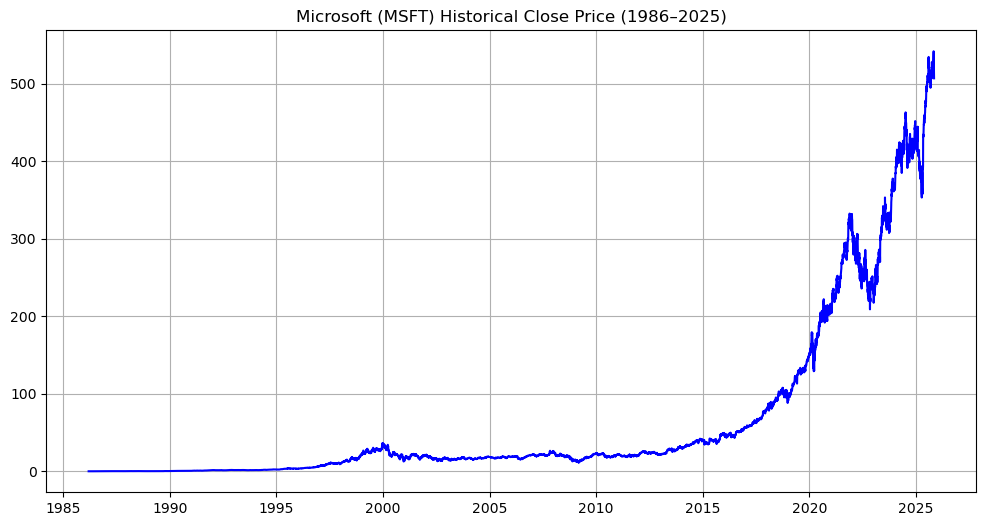

In [60]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(df.index, df['Close'], color='blue')
plt.title('Microsoft (MSFT) Historical Close Price (1986–2025)')
plt.grid(True)
plt.show()

In [61]:
data = data[['Close']]
data.dropna(inplace=True)

In [62]:
from sklearn.preprocessing import MinMaxScaler

# Scale the data 
scaler = MinMaxScaler()
data['Close'] = scaler.fit_transform(data[['Close']])

In [63]:
import numpy as np
import datetime

#  Helper function 
def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=30):
    """Convert time series into a windowed dataframe (for LSTM input)."""
    def str_to_datetime(s):
        return datetime.datetime.strptime(s, "%Y-%m-%d")

    first_date = str_to_datetime(first_date_str)
    last_date = str_to_datetime(last_date_str)

    target_date = first_date
    dates, X, Y = [], [], []

    all_dates = dataframe.index.to_list()
    i = all_dates.index(target_date)

    while True:
        if i - n < 0:
            break
        window = dataframe.iloc[i - n:i + 1]['Close'].to_numpy()
        if len(window) != n + 1:
            break

        x = window[:-1]
        y = window[-1]
        dates.append(all_dates[i])
        X.append(x)
        Y.append(y)

        if all_dates[i] == last_date:
            break
        i += 1
        if i >= len(all_dates):
            break

    # Build new dataframe
    X = np.array(X)
    windowed_df = pd.DataFrame({'Target Date': dates})
    for j in range(n):
        windowed_df[f'Target-{n-j}'] = X[:, j]
    windowed_df['Target'] = Y

    return windowed_df

# Create windowed dataframe 
windowed_df = df_to_windowed_df(data, '2020-01-02', '2025-11-05', n=30)
print("\nWindowed DataFrame:")
print(windowed_df.head())
print(f"\nShape: {windowed_df.shape}")


Windowed DataFrame:
  Target Date  Target-30  Target-29  Target-28  Target-27  Target-26  \
0  2020-01-02   0.262856   0.262944   0.262487   0.262242   0.262435   
1  2020-01-03   0.262944   0.262487   0.262242   0.262435   0.265313   
2  2020-01-06   0.262487   0.262242   0.262435   0.265313   0.266717   
3  2020-01-07   0.262242   0.262435   0.265313   0.266717   0.267226   
4  2020-01-08   0.262435   0.265313   0.266717   0.267226   0.265576   

   Target-25  Target-24  Target-23  Target-22  ...  Target-9  Target-8  \
0   0.265313   0.266717   0.267226   0.265576  ...  0.270824  0.273176   
1   0.266717   0.267226   0.265576   0.262365  ...  0.273176  0.276159   
2   0.267226   0.265576   0.262365   0.261943  ...  0.276159  0.276159   
3   0.265576   0.262365   0.261943   0.262891  ...  0.276159  0.276106   
4   0.262365   0.261943   0.262891   0.263031  ...  0.276106  0.278371   

   Target-7  Target-6  Target-5  Target-4  Target-3  Target-2  Target-1  \
0  0.276159  0.276159  0.2

In [64]:
# Prepare data for model
def windowed_df_to_date_X_y(windowed_dataframe):
    df_as_np = windowed_dataframe.to_numpy()

    dates = df_as_np[:,0]

    middle_matrix = df_as_np[:,1:-1]
    X = middle_matrix.reshape((len(dates), middle_matrix.shape[1],1))

    Y = df_as_np[:, -1]
    
    return dates , X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)
print(dates.shape, X.shape, y.shape)

(1470,) (1470, 30, 1) (1470,)


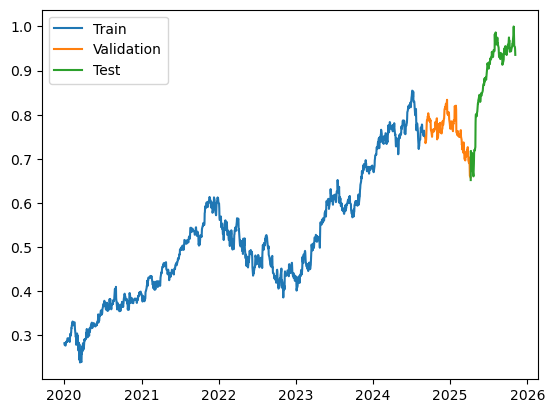

In [65]:
# Prepare data for model 
q_80 = int(len(dates) * 0.8)
q_90 = int(len(dates) * 0.9)

dates_train , X_train , y_train = dates[:q_80], X[:q_80], y[:q_80]
dates_val ,X_val ,y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test ,X_test ,y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)
plt.legend(['Train','Validation','Test'])

In [66]:
# Build the model 
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

model = Sequential([layers.Input((30,1)),
                    layers.LSTM(64, return_sequences=True),
                    layers.Dropout(0.2),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse', 
              optimizer = Adam(learning_rate=0.0005),
              metrics=['mean_absolute_error'])

lr_scheduler = ReduceLROnPlateau(monitor='val_loss', 
                                 factor=0.5, patience=5, verbose=1)


early_stopping = EarlyStopping(monitor='val_loss', 
                               patience=10, restore_best_weights=True)

# train the model
history = model.fit(X_train, y_train,
          validation_data=(X_val, y_val),
          epochs=300,
          callbacks=[early_stopping, lr_scheduler],
           verbose=1)

Epoch 1/300
37/37 [==============================] - 5s 37ms/step - loss: 0.0596 - mean_absolute_error: 0.1787 - val_loss: 0.0114 - val_mean_absolute_error: 0.1037 - lr: 5.0000e-04
Epoch 2/300
37/37 [==============================] - 1s 18ms/step - loss: 0.0021 - mean_absolute_error: 0.0369 - val_loss: 0.0013 - val_mean_absolute_error: 0.0294 - lr: 5.0000e-04
Epoch 3/300
37/37 [==============================] - 1s 18ms/step - loss: 0.0011 - mean_absolute_error: 0.0262 - val_loss: 8.6862e-04 - val_mean_absolute_error: 0.0225 - lr: 5.0000e-04
Epoch 4/300
37/37 [==============================] - 1s 19ms/step - loss: 7.7940e-04 - mean_absolute_error: 0.0223 - val_loss: 6.1771e-04 - val_mean_absolute_error: 0.0195 - lr: 5.0000e-04
Epoch 5/300
37/37 [==============================] - 1s 20ms/step - loss: 6.6935e-04 - mean_absolute_error: 0.0206 - val_loss: 5.3555e-04 - val_mean_absolute_error: 0.0189 - lr: 5.0000e-04
Epoch 6/300
37/37 [==============================] - 1s 18ms/step - loss: 6